In [1]:
# Importing the data
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r'C:\Users\LimaA\Desktop\movies.csv')

In [4]:
df = df.dropna()
df = df.drop_duplicates()

In [5]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [6]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
pd.set_option('display.max_rows', None)

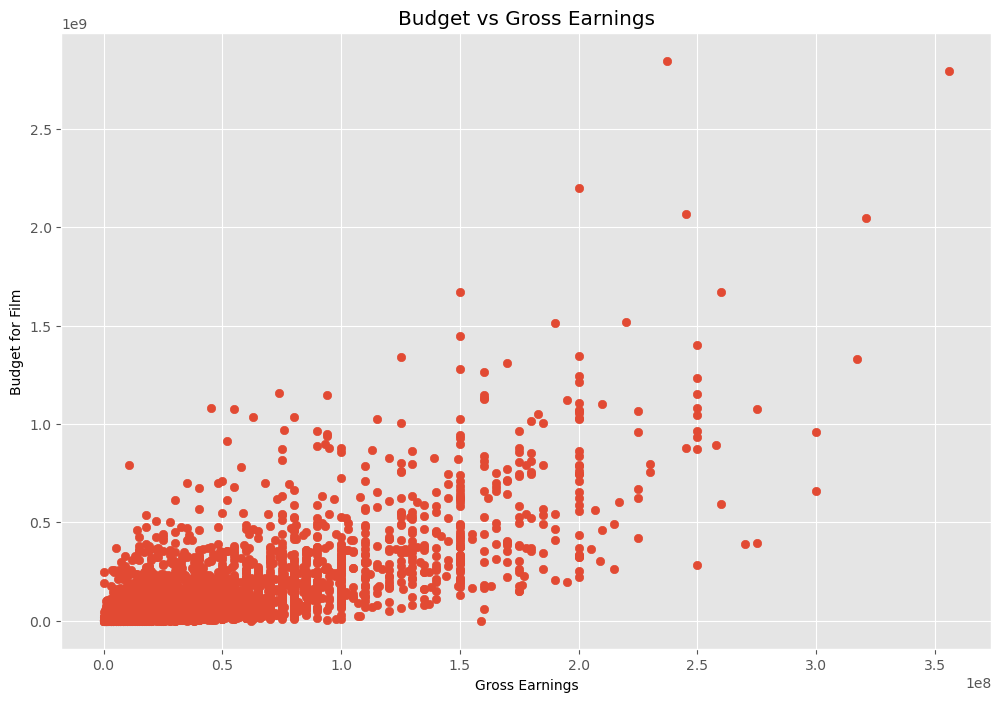

In [13]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

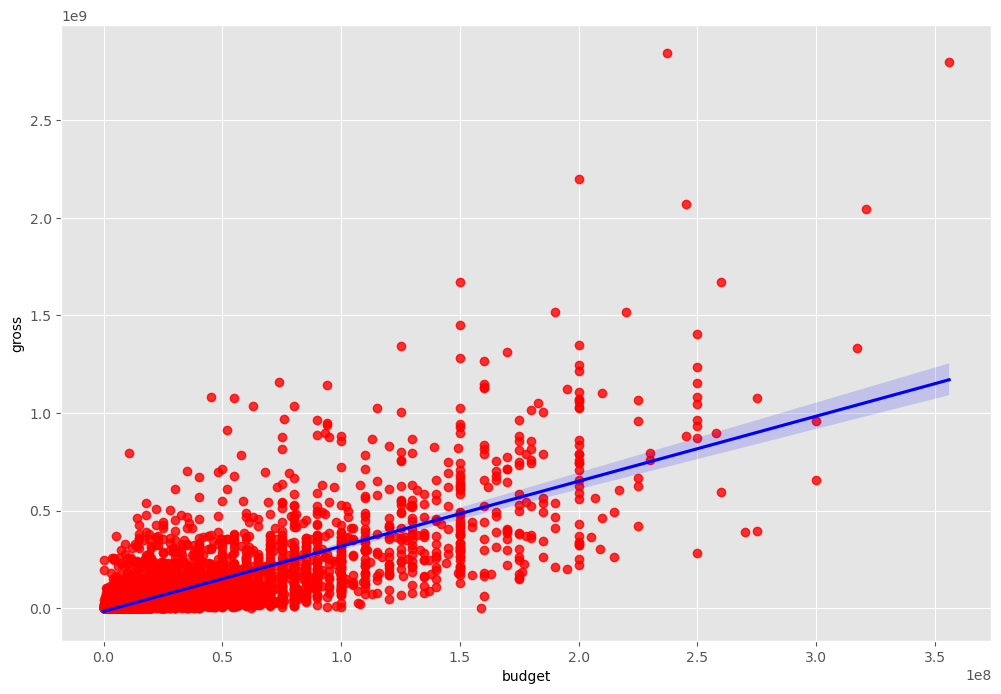

In [17]:
# Plot the budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

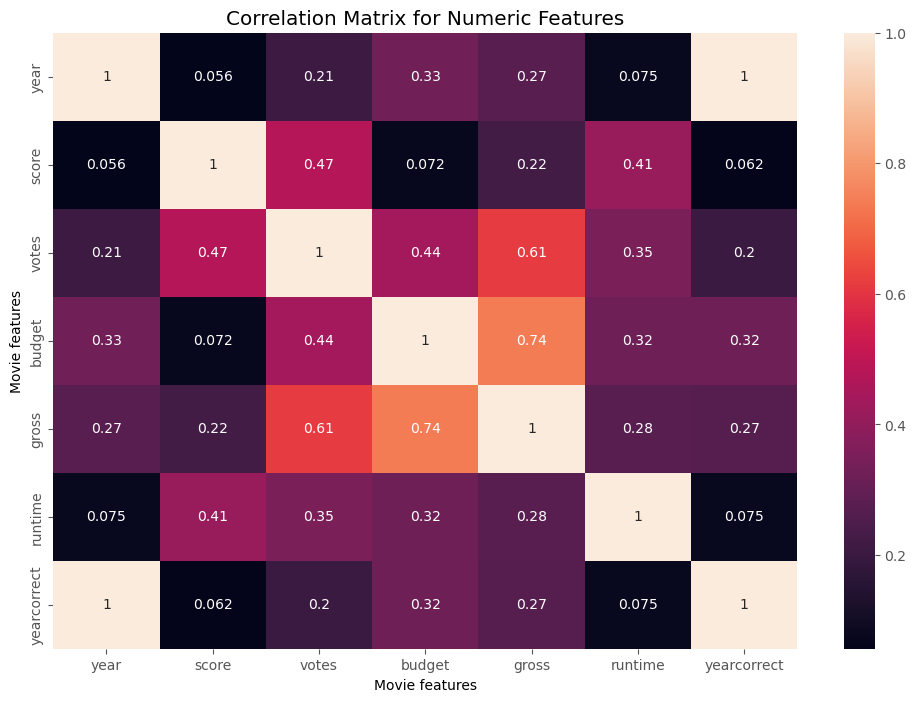

In [27]:
correlation_matrix = df.corr(numeric_only = True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [28]:
# Look at company correlation
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [30]:
df_numerized = df
for col_name in df_numerized.columns: 
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1     3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3      204       4      4  1980      1127    7.7   221000.0       889    1413   
4      732       6      4  1980      1170    7.3   108000.0       719     351   
5     1509       6      9  1980      1922    6.4   123000.0      1758    3081   
6     3930       6      0  1980      1359    7.9   188000.0       974     576   
7     3122       6      3  1980       530    8.2   330000.0      1269    1257   
8     3732       4      0  1980      1346    6.8   101000.0      1606    1402   
9     4401       6      3  1980      1755    7.0    10000.0      2011     280   
10     332       4      0  1980       510    6.1    18000.0       236    2810   
11    4179       4      1  1980      2272    7.3    54000.0       817    1300   
12    3029       4      1  1980       471    5.3    30000.0      1643    1658   
13    2859       6      6  1980      2416    7.7    49000.0      1666    1653   
14    1208       6      5  1980      1170    7.1    37000.0       207     350   
15    3553       4      6  1980      2294    7.2    27000.0       847    2507   
17      66       4      4  1980       530    6.9    29000.0       333    2315   
18    4143       6      9  1980       832    6.8    66000.0       943    1486   
20     986       6      5  1980       714    6.5    20000.0      2032    3151   
21    1762       6      1  1980       117    6.8    14000.0      1307    2065   
22    4128       4      0  1980       213    6.7    22000.0       502    2959   
23    5289       4      8  1980       437    5.3    12000.0      1654    2492   
28     700       6      5  1980      1359    7.2    17000.0      1870    3099   
29     261       6      5  1980       667    6.2    22000.0      1489    2358   
33     785       4      6  1980       117    6.1      604.0      1146     673   
35    3068       6      4  1980      2156    6.2    24000.0       744    2207   
36    4245       6      4  1980      1883    6.3     4300.0       581     966   
37    2618       6      4  1980      2257    6.0    11000.0      1116    2578   
42    4736       6      0  1980      1413    7.1     9000.0      1613    1802   
46    4312       6      0  1980      1304    5.3     3900.0      1337    2383   
48    4512       4      0  1980      1922    5.1     3100.0       329    2036   
50    3648       4      4  1980      2476    7.3    22000.0      2043    3184   
51    2497       6      4  1980      2416    6.8     4500.0      1025     303   
53     692       4      0  1980      1289    6.1    11000.0       327     768   
56    5193       4      0  1980      1629    4.6     2600.0       793    1078   
57    2818       4      4  1980      1051    5.4     2400.0       914    2623   
58    4519       6      0  1980       261    5.1     5200.0       551    1819   
75    4351       1      1  1980      1399    5.8     1300.0       267     939   
77    5240       6      4  1980       261    5.9      415.0      1484    1339   
80    2971       6      6  1980      2551    4.0      546.0       969    1014   
92    1973       4      0  1981      1296    8.4   905000.0      1859    1806   
94     284       6      4  1981       314    7.5    97000.0       974    1524   
95    1301       6      0  1981      1040    7.2   131000.0       943    1486   
96    4100       2      9  1981        46    7.5   192000.0      1735    2707   
97    3031       6      4  1981      1568    6.2    40000.0       177     307   
98     603       6      5  1981      1162    7.4    47000.0       207     350   
99     861       4      0  1981      1296    6.9    42000.0       478     277   
100   1329       6      1  1981        11    7.4    59000.0       937    2963   
101   2389       6      0  1981      

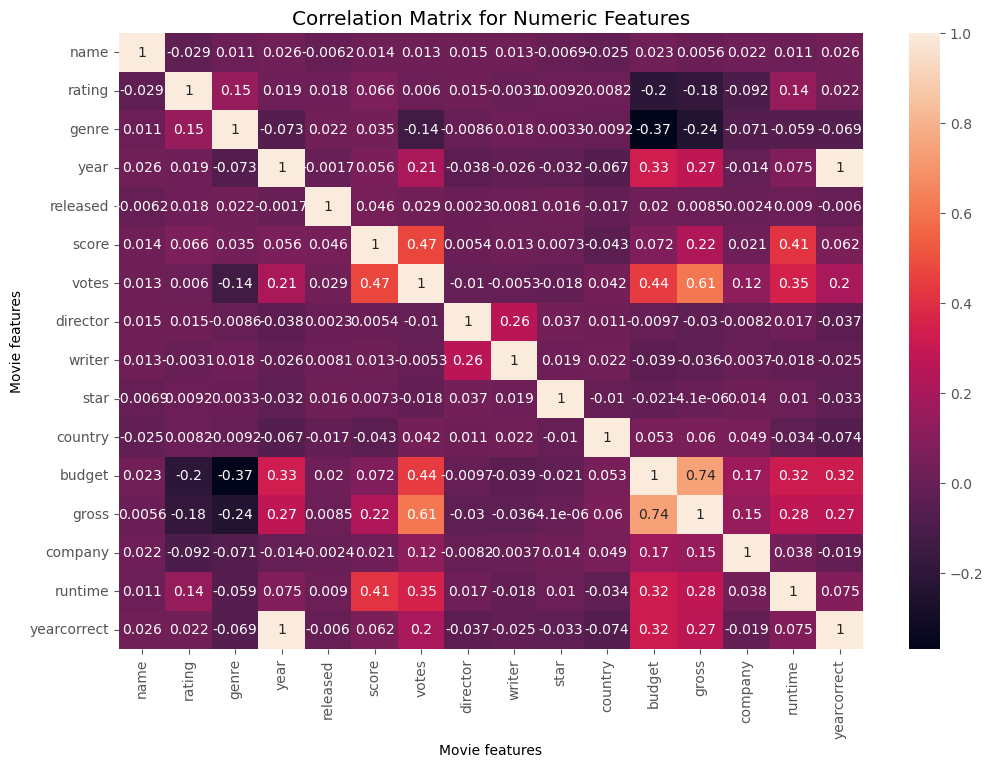

In [32]:
correlation_matrix = df_numerized.corr(numeric_only = True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [34]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [35]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [36]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64